## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Loading the Dataset

In [2]:
df = pd.read_excel('./ANZ_synthesised_transaction_dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

## Modifying the dataset to obtain salaries for each customer

In [4]:
df_salaries = df[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, CUS-1005756958 to CUS-883482547
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_present_flag  0 non-null      float64
 1   merchant_code      100 non-null    float64
 2   balance            100 non-null    float64
 3   age                100 non-null    int64  
 4   amount             100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.7+ KB


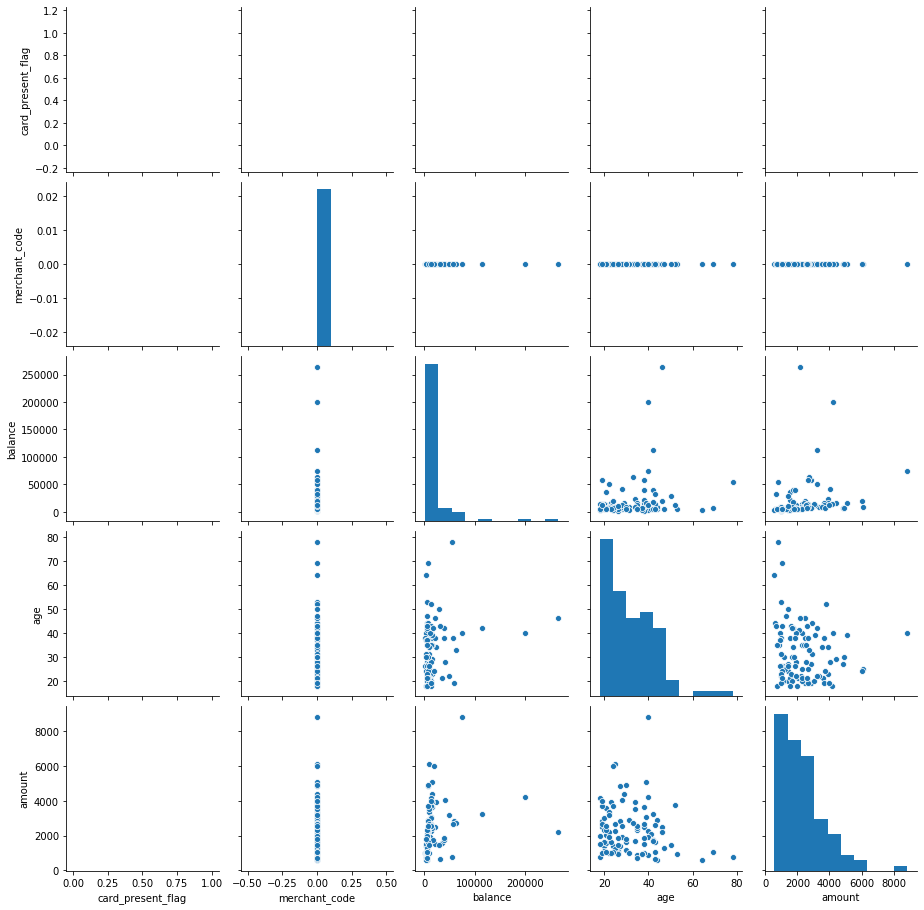

In [7]:
sns.pairplot(df_salaries)

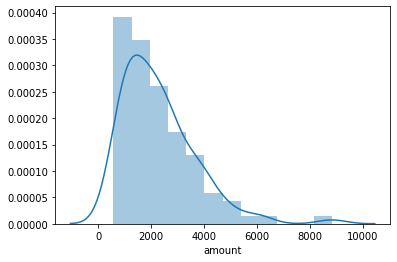

In [10]:
sns.distplot(df_salaries['amount'])

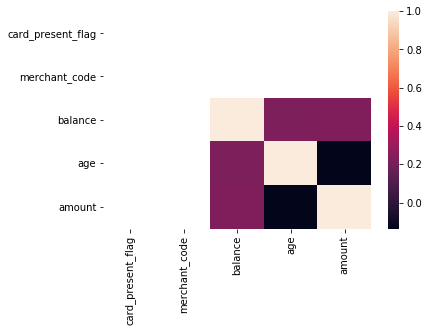

In [11]:
sns.heatmap(df_salaries.corr())

### Creating annual salary column (Output variable - y)

In [12]:
salaries = []

for customer_id in df['customer_id']:
    salaries.append(int(df_salaries.loc[customer_id]['amount']))
    
df['annual_salary'] = salaries

In [13]:
df_salaries = df.groupby('customer_id').mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


## Predictive Analytics

In [14]:
X = df_salaries.drop(['annual_salary'], axis=1).values
y = df_salaries['annual_salary'].values

# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values   # can also be done

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 1. Linear Regression

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_train, y_train)

0.19784255810106932

In [17]:
y_pred = linear_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1686.79 1068.  ]
 [2377.92 4054.  ]
 [2830.96  983.  ]
 [2207.95 1640.  ]
 [1950.86 5103.  ]
 [1622.71 1541.  ]
 [2256.68 1098.  ]
 [1811.74 1681.  ]
 [2364.19 3785.  ]
 [1468.15  970.  ]
 [1293.35  892.  ]
 [1892.71 2308.  ]
 [2573.53 4132.  ]
 [2550.53 1560.  ]
 [1932.47 6024.  ]
 [1922.16 3903.  ]
 [2553.34 1928.  ]
 [2871.15 3195.  ]
 [1778.24 1408.  ]
 [2382.88 2485.  ]]


In [18]:
linear_reg.predict([[0.598, 0.2, 5759.458, 32, 415.487]])   # predicting for new values:)

array([3133.33])

In [19]:
# print the intercept
print(linear_reg.intercept_)

3466.709869969194


In [20]:
linear_reg.score(X_test, y_test)

-0.026210473890939

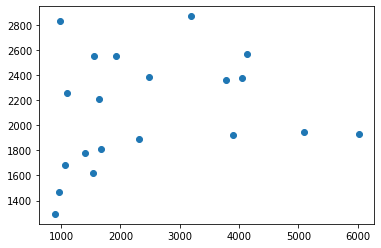

In [21]:
plt.scatter(y_test,y_pred)

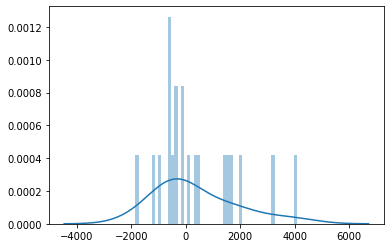

In [22]:
sns.distplot((y_test-y_pred),bins=50);

In [23]:
from sklearn import metrics

In [24]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error: 1100.6280814324564
Mean squared error: 2277505.632779021
Root mean squared error: 1509.1406935004507


### 2. Decision tree (for regression and classification)

**Decision tree regression**

In [25]:
dtree_reg = DecisionTreeRegressor(random_state = 42)

In [26]:
dtree_reg.fit(X_train, y_train)
dtree_reg.score(X_train, y_train)

1.0

In [27]:
dtree_reg.predict(X_test)

array([2101., 2718., 3328., 2218., 2588., 1630., 2282.,  596., 3071.,
       1272., 1808., 1946., 2639., 3026., 1225., 1037., 1626., 4405.,
       1808., 2218.])

In [28]:
dtree_reg.score(X_test, y_test)

-0.27465109729970183

In [29]:
dtree_reg.predict([[0.8523, 0.4, 26487.433755, 28, 142.125696]])

array([1433.])

**Decision tree classification**

In [30]:
decision_tree_class = DecisionTreeClassifier()

In [31]:
decision_tree_class.fit(X_train, y_train)
decision_tree_class.score(X_train, y_train)

1.0

In [32]:
pred = decision_tree_class.predict(X_test)

In [33]:
decision_tree_class.score(X_test, y_test)

0.0